# Define directions in the unit circle/sphere

In order to compute the Euler Characteristic Transform, we must define first a set of directions to filter through. This set of directions can be thought as a set of points on the unit circle/sphere. 

In the 2D case, defining either randomly or regularly distributed point on the circle is straightforward. For the 3D case, things can get a bit trickier. Here we followed the argument laid out by M Deserno [_How to generate equidistributed points on the surface of a sphere_](https://www.cmu.edu/biolphys/deserno/pdf/sphere_equi.pdf) to define both uniformly random or regular direction choice.

In [1]:
import tifffile as tf
import numpy as np
import os
import argparse
import glob
import math
import importlib
import time
import itertools
import pandas as pd
from matplotlib import pyplot as plt
import scipy.ndimage as ndimage
import scipy.special as special
from matplotlib import cm

## All the relevant code is in the `directions` module

- The implementations so far only work for the 2D and 3D cases.

In [2]:
import demeter.directions as dirs

## Strategy #1

### Fixed number of parallels and meridians with `pole_directions`

- Fix a number of parallels equispaced between the equator and the north pole. 
- Take also the same number of equispaced parallels between the equator and the sout pole.
- Fix a number of equispaced meridians.
- Add the north and south poles.

The set of directions will be defined by the intersection of these parallels and meridians
- Observe that by construction, we will always consider a subset of directions at the equator 

In [11]:
parallels = 5
meridians = 18
pdirections = dirs.pole_directions(parallels,meridians,x=1,y=0,z=2)

### Plot the directions with `plot_pole_directions`

- `pdirections`: Nx3 numpy.array with the Cartesian coordinates of points on the sphere
- `title`: String with the plot title (default: "title")
- `parallels`: int. How many equispaced parallels between equator and poles to draw.
- `meridians`: int. How many equispaced meridians to consider (determines how round the parallels will look like)
- `save_fig`: bool. Should the plot be saved in as external PDF and JPG files?
- `dst`: string. If so, what is the destination directory to save the files to?
- `filename`: string. Name of the files to be created.

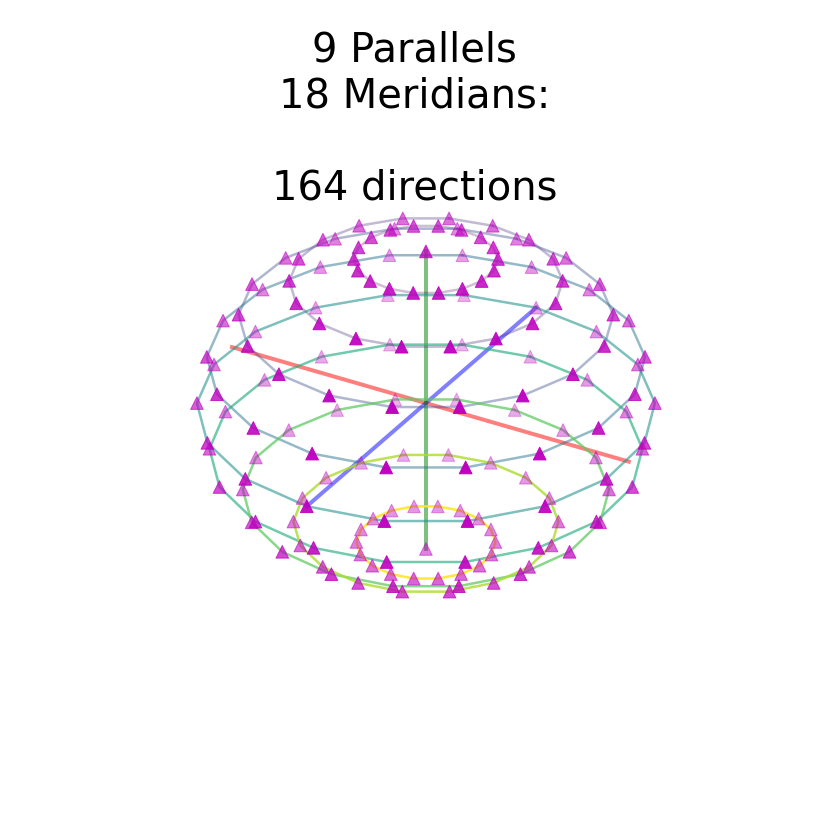

In [12]:
dst = '../data/directions/'
title = '{} Parallels\n{} Meridians:\n\n{} directions'.format(parallels*2-1, meridians, len(pdirections))
filename = 'pole_directions_p{}_m{}'.format(parallels,meridians)

dirs.plot_pole_directions(pdirections, title, parallels, meridians, 
                          save_fig=False, dst=dst,filename=filename)

## Strategy #2

### Uniform random placement with `random_directions`

- `N`: scalar. Number of directions to consider
- `r`: Radius of the sphere (`r=1` by default)
- `dim`: scalar. Dimension. `d=3` by default. Only `d=2` and `d=3` are valid values.

In [14]:
rdirections = dirs.random_directions(len(pdirections))

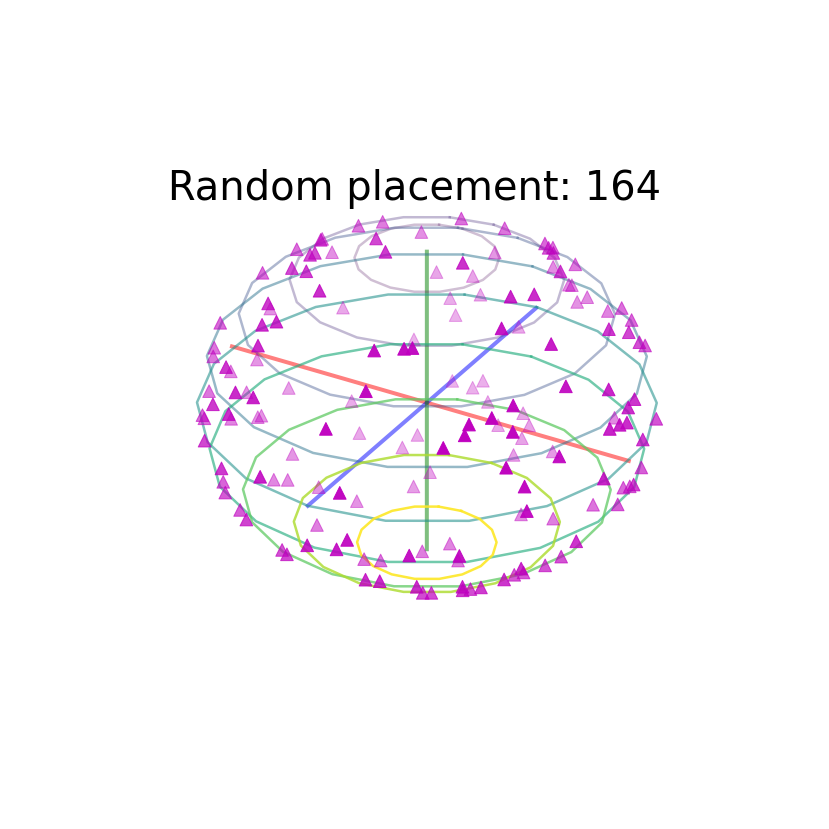

In [16]:
title = 'Random placement: {}'.format(len(rdirections))
filename = 'random_directions_{}'.format(len(rdirections))
dirs.plot_pole_directions(rdirections, title, parallels, meridians, 
                          dst=dst,filename=filename)

## Strategy #3

### Regular placement with `regular_directions`

- Make sure that all the sphere points are apart from each other by roughly the same amount
- _Caveat_: There are some values `N` for which numerical trouble arises.

In [17]:
udirections = dirs.regular_directions(len(pdirections))

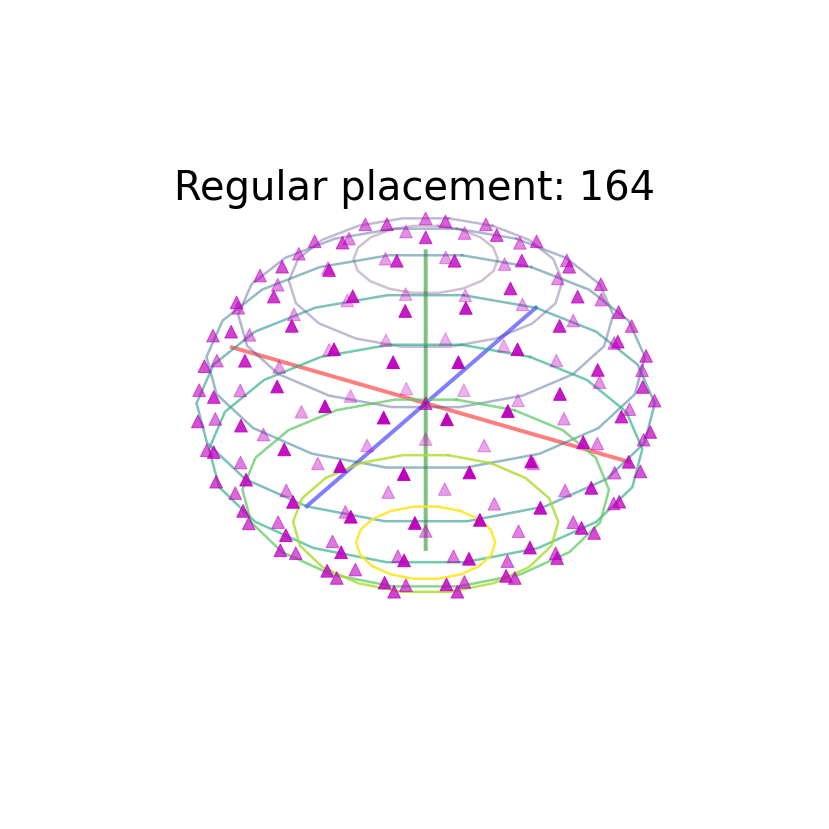

In [19]:
title = 'Regular placement: {}'.format(len(udirections))
filename = 'uniform_directions_{}'.format(len(udirections))
dirs.plot_pole_directions(udirections, title, parallels, meridians,
                          dst=dst,filename=filename)